WEEK 2 Progress

In [15]:
!pip install ultralytics==8.2.100 opencv-python-headless==4.9.0.80 matplotlib numpy --quiet


In [16]:
from ultralytics import YOLO
import cv2, numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from IPython.display import Image, display


In [22]:
print("📁 Upload a road/traffic image or frame:")
uploaded = files.upload()
img_path = next(iter(uploaded))
print(f"✅ File uploaded: {img_path}")


📁 Upload a road/traffic image or frame:


Saving traffic.jpg to traffic.jpg
✅ File uploaded: traffic.jpg


In [23]:
model = YOLO("yolov8x.pt")
print("✅ YOLOv8x model loaded (high accuracy)")


✅ YOLOv8x model loaded (high accuracy)


In [24]:
def calc_greenery_percentage(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_green = np.array([35, 40, 40])
    upper_green = np.array([85, 255, 255])
    mask = cv2.inRange(hsv, lower_green, upper_green)
    green_ratio = np.sum(mask > 0) / mask.size * 100
    return round(green_ratio, 2)


In [25]:
def calc_smoke_percentage(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (9,9), 0)
    smoke_mask = cv2.inRange(blur, 160, 220)  # light-gray zones
    smoke_ratio = np.sum(smoke_mask > 0) / smoke_mask.size * 100
    return round(smoke_ratio, 2)


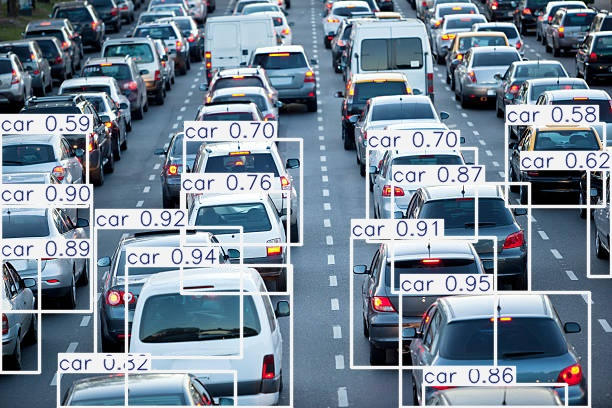

✅ Detection complete – saved as ecovision_output.jpg

🚗 Vehicles detected: 15
🌿 Greenery: 0.65%
🌫️ Smoke: 17.26%
🚦 Congestion: High
🌍 Eco-Score: 0/100


In [26]:
# Read uploaded image
img = cv2.imread(img_path)

# YOLO detection (cars, motorbikes, buses, trucks)
results = model.predict(
    source=img,
    imgsz=960,            # keep moderate resolution to avoid enlargement
    conf=0.55,
    iou=0.45,
    classes=[2, 3, 5, 7],
    verbose=False
)

# Annotate image (draw rectangles)
annotated = results[0].plot()
cv2.imwrite("ecovision_output.jpg", annotated)

# Metrics
vehicle_count = len(results[0].boxes)
green_perc = calc_greenery_percentage(img)
smoke_perc = calc_smoke_percentage(img)

# Eco-Score (weighted formula)
eco_score = max(0, min(100, int((green_perc*0.6) - (smoke_perc*0.4) - (vehicle_count*1.5))))
eco_score = max(0, eco_score)

# Congestion level
if vehicle_count < 5:
    congestion = "Low"
elif vehicle_count < 15:
    congestion = "Medium"
else:
    congestion = "High"

# Display image directly (no enlargement)
from IPython.display import Image, display
display(Image("ecovision_output.jpg"))

# Summary
print("✅ Detection complete – saved as ecovision_output.jpg\n")
print(f"🚗 Vehicles detected: {vehicle_count}")
print(f"🌿 Greenery: {green_perc}%")
print(f"🌫️ Smoke: {smoke_perc}%")
print(f"🚦 Congestion: {congestion}")
print(f"🌍 Eco-Score: {eco_score}/100")
